# Regression from scratch

# Linear Regression

In [1]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model

In [2]:
#Generating Random numbers
B1 = np.arange(0,10)
B0=np.ones((10,1))

In [3]:
## Stacking the B0 and B1 together in X variable
X=np.column_stack((B0,B1))
## Generating Target variable Matrix
y = B1+2*np.random.random((10)) - 1

Text(0,0.5,'dependent Variable')

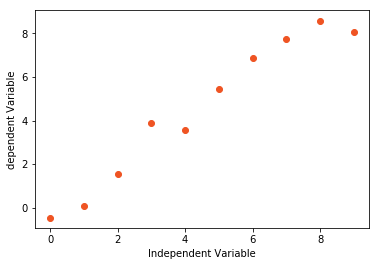

In [4]:
# Ploting Line
plt.scatter(B1, y, c='#ef5423', label='Scatter Plot')
plt.xlabel("Independent Variable")
plt.ylabel("dependent Variable")

In [5]:
xx=inv(np.matmul(np.transpose(X),X))
xy=np.matmul(np.transpose(X),y)
B=np.matmul(xx,xy)
print('Estimation of Coffecients',B)

Estimation of Coffecients [-0.325082    1.07937789]


In [6]:
#xx=inv(np.matmul(np.transpose(X),X))
#xy=np.matmul(np.transpose(X),y)
##B=np.matmul(xx,xy)
#print(B)

# Root Mean Square error and R-square

In [7]:
#rmse
rmse = 0
b0=B[0]
b1=B[1]
for i in range(len(B1)):
    observed=b0+b1*X[:,1:][i]
    #print(observed)
    rmse += (y[i] - observed) ** 2
    #rmse = np.sqrt(rmse)
print('Root mean Square',rmse)

Root mean Square [4.38802266]


# Total Sum of Square

In [8]:
##Total variation in y,also represent as (Actual value of y minus Average value of y)
msa = 0
for i in range(len(B1)):
    msa += (y[i] - np.mean(y)) ** 2
    msa = msa/len(y)
print('Mean Square Error',msa)     

Mean Square Error 1.4280556663702177


# R-Square

In [9]:
# R-square value
#R-square means that the variation of y described by the x variables
rsquare=0
ssr=0
tss=0
observed=0
for i in range(len(B1)):
    observed=b0+b1*X[:,1:][i]
    ssr +=(y[i] - observed) ** 2
    tss += (y[i] - np.mean(y)) ** 2
rsquare=1-(ssr/tss)
print('R-Square',rsquare)

R-Square [0.95634034]


Text(0.5,1,'Regression Line plot')

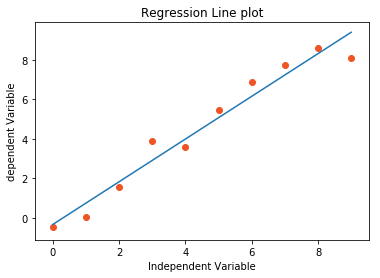

In [10]:
# Ploting Scatter Points
reg_line=[b1*X[:,1:][i]+b0 for i in range(len(B1))]
plt.plot(B1,reg_line)
plt.scatter(B1, y, c='#ef5423', label='Scatter Plot')
plt.xlabel("Independent Variable")
plt.ylabel("dependent Variable")
plt.title("Regression Line plot")

# Using Sklearn Library

In [11]:
## Using Sklearn Library
from sklearn.metrics import mean_squared_error
reg = linear_model.LinearRegression()
reg.fit(X,y)
print('Coffecient of Linear regression model',reg.coef_,
      '\nIntercept of Linear regression model ',reg.intercept_)

Coffecient of Linear regression model [0.         1.07937789] 
Intercept of Linear regression model  -0.3250820008719195


In [12]:
# Y Prediction
Y_pred = reg.predict(X)
# R2 Score
r2_score = reg.score(X, y)
print(r2_score)

0.9563403393551354


# Multiple Regression using Matrixs

In [13]:
ran = np.random.RandomState(123)
B0=np.ones((10,1))
B1=50*ran.rand(10,5)

In [14]:
## Stacking the B0 and B1 together in X variable
X=np.column_stack((B0,B1))
## Generating Target variable Matrix
y=np.random.rand(10,1)

In [15]:
## Getting the Red color part from above Image
xx=inv(np.matmul(np.transpose(X),X))
xy=np.matmul(np.transpose(X),y)
B=np.matmul(xx,xy)
print(B)

[[ 1.11666681e+00]
 [-1.05295330e-03]
 [-2.60268345e-03]
 [-8.70839224e-03]
 [ 1.18963300e-02]
 [-1.47614344e-02]]


In [16]:
## Using Sklearn Library
reg = linear_model.LinearRegression()
reg.fit(X,y)
print('Coffecient of Linear regression model',reg.coef_,
      '\nIntercept of Linear regression model ',reg.intercept_)

Coffecient of Linear regression model [[ 0.         -0.00105295 -0.00260268 -0.00870839  0.01189633 -0.01476143]] 
Intercept of Linear regression model  [1.11666681]


# Multiple Regression on data-set

In [17]:
import pandas as pd
df=pd.read_csv("mlr05.csv")

In [18]:
# Dividing data-set into Target and Independent variable
y=df['Y'].values
a=df.drop('Y',axis=1).values

The only thing I need to generate is sequence of 1 and then stack it with Independent variiables 

In [19]:
X=np.column_stack((np.ones(shape=y.shape),a))

In [20]:
xx=inv(np.matmul(np.transpose(X),X))
xy=np.matmul(np.transpose(X),y)
B=np.matmul(xx,xy)
print(B)

[10.51046037 -0.05948369  0.80587881  0.01605365  0.17191025  0.4109845 ]


In [21]:
##Using Library of Sklearn
mod = linear_model.LinearRegression()
mod.fit(X,y)
print('Coffecient of Linear regression model',mod.coef_,
      '\nIntercept of Linear regression model ',mod.intercept_)

Coffecient of Linear regression model [ 0.         -0.05948369  0.80587881  0.01605365  0.17191025  0.4109845 ] 
Intercept of Linear regression model  10.510460373089467
